<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-raw-test-data" data-toc-modified-id="Read-raw-test-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read raw test data</a></span></li><li><span><a href="#Create-X" data-toc-modified-id="Create-X-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create X</a></span></li><li><span><a href="#Create-Y" data-toc-modified-id="Create-Y-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Y</a></span></li><li><span><a href="#Prepare-Pipeline-Fit" data-toc-modified-id="Prepare-Pipeline-Fit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prepare Pipeline Fit</a></span></li><li><span><a href="#predict-y-using-Pipeline-Fit" data-toc-modified-id="predict-y-using-Pipeline-Fit-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>predict y using Pipeline Fit</a></span></li><li><span><a href="#ROC-plot-to-compare-performance-of-various-models-and-fits" data-toc-modified-id="ROC-plot-to-compare-performance-of-various-models-and-fits-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ROC plot to compare performance of various models and fits</a></span></li></ul></div>

# Submission 1, ML Assignment 1

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline

### Read raw test data

In [19]:
amazon = pd.read_csv('../../../data/amazon_data/raw_data_test.csv')
print(amazon.shape)

(91000, 14)


### Create X

In [20]:
X = amazon
print(X.shape)

(91000, 14)


### Create Y

In [21]:
y = amazon['helpful'].values
print(type(y))

<class 'numpy.ndarray'>


### Prepare Pipeline Fit

In [22]:
import sys
sys.path.append('./')
from pipelineHelpers import CalculateQuantativeFeatures, SelectCol

In [23]:
# unload pipeline pickle
pipeline = joblib.load('pipeline.pkl')

### predict y using Pipeline Fit

In [24]:
# MODEL: Naive Bayes

nbs_performance = BinaryClassificationPerformance(pipeline.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


{'Pos': 6708, 'Neg': 84292, 'TP': 2702, 'TN': 72060, 'FP': 12232, 'FN': 4006, 'Accuracy': 0.82156043956043956, 'Precision': 0.18092942279362528, 'Recall': 0.4028026237328563, 'desc': 'nbs'}


previous results (for reference): {'Pos': 6653, 'Neg': 84347, 'TP': 990, 'TN': 82920, 'FP': 1427, 'FN': 5663, 'Accuracy': 0.92208791208791208, 'Precision': 0.40959867604468347, 'Recall': 0.14880505035322411, 'desc': 'rdg'}

In [9]:
fit = pipeline.predict(X)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


### ROC plot to compare performance of various models and fits

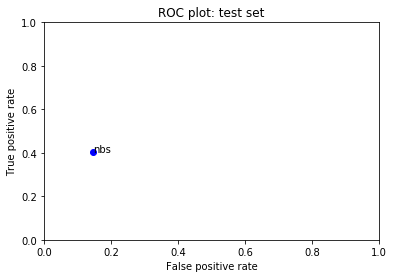

In [10]:
fits = [nbs_performance]

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()